In [2]:
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Rescaling
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [6]:
train_folder = 'C:/Users/marco/OneDrive/Documentos/GitHub/proyectoFinalTD/CarneDataset/train'
test_folder = 'C:/Users/marco/OneDrive/Documentos/GitHub/proyectoFinalTD/CarneDataset/test'

In [7]:
#Generadores de datos con preprocesamiento
train_dataset = tf.keras.utils.image_dataset_from_directory(train_folder, validation_split = 0.1, subset = "training", seed = 123, image_size = [300,300])

num_classes = train_dataset.class_names
print(num_classes)

test_dataset = tf.keras.utils.image_dataset_from_directory(test_folder, seed = 123, image_size = [300,300])

Found 1633 files belonging to 8 classes.
Using 1470 files for training.
['CLASS_01', 'CLASS_02', 'CLASS_03', 'CLASS_04', 'CLASS_05', 'CLASS_06', 'CLASS_07', 'CLASS_08']
Found 810 files belonging to 8 classes.


In [8]:
#Generadores de datos con preprocesamiento
train_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()
#Tamaño de la imagen
batch_size = 32
image_size = (300, 300)
#Carga de datos de train con el generador de datos
train_generator = train_datagen.flow_from_directory(
    train_folder,
    target_size=image_size,
    #batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)
#Carga de datos de test con el generador de datos
test_generator = test_datagen.flow_from_directory(
    test_folder,
    target_size=image_size,
    #batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 1633 images belonging to 8 classes.
Found 810 images belonging to 8 classes.


In [10]:
#Obtención del numero de clases
num_classes = train_generator.num_classes

#Arquitectura del modelo
model = Sequential()
model.add(Rescaling(1./255, input_shape=(image_size[0], image_size[1], 3)))
model.add(Conv2D(32, 3, activation='relu',))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])
history = model.fit(
    train_dataset,
    epochs=30,  
    batch_size = 64
)

Epoch 1/30
46/46 [==============================] - 149s 3s/step - loss: 1.6114 - accuracy: 0.5673
Epoch 2/30
46/46 [==============================] - 146s 3s/step - loss: 0.8460 - accuracy: 0.7068
Epoch 3/30
46/46 [==============================] - 147s 3s/step - loss: 0.6084 - accuracy: 0.7789
Epoch 4/30
46/46 [==============================] - 151s 3s/step - loss: 0.3989 - accuracy: 0.8646
Epoch 5/30
46/46 [==============================] - 145s 3s/step - loss: 0.2773 - accuracy: 0.8973
Epoch 6/30
46/46 [==============================] - 144s 3s/step - loss: 0.2028 - accuracy: 0.9238
Epoch 7/30
46/46 [==============================] - 130s 3s/step - loss: 0.1347 - accuracy: 0.9544
Epoch 8/30
46/46 [==============================] - 144s 3s/step - loss: 0.1502 - accuracy: 0.9463
Epoch 9/30
46/46 [==============================] - 143s 3s/step - loss: 0.0957 - accuracy: 0.9701
Epoch 10/30
46/46 [==============================] - 143s 3s/step - loss: 0.0783 - accuracy: 0.9694
Epoch 11/

In [11]:
# Evaluación del modelo
train_loss, train_accuracy = model.evaluate(train_dataset, verbose=1)
#Precisión del modelo
print(f'Train Accuracy: {round(train_accuracy*100, 2)}%')

46/46 [==============================] - 37s 798ms/step - loss: 2.2533e-04 - accuracy: 1.0000
Train Accuracy: 100.0%


In [12]:
#Predicción de clases de entrenamiento
train_predictions = model.predict(train_generator, verbose=1)
train_pred_classes = np.argmax(train_predictions, axis=1)
#Resultado de verdaderas clases de entrenamiento
train_true_classes = train_generator.classes

52/52 [==============================] - 41s 794ms/step


In [13]:
#Matriz de confusión para imágenes de entrenamiento
train_cm = confusion_matrix(train_true_classes, train_pred_classes)

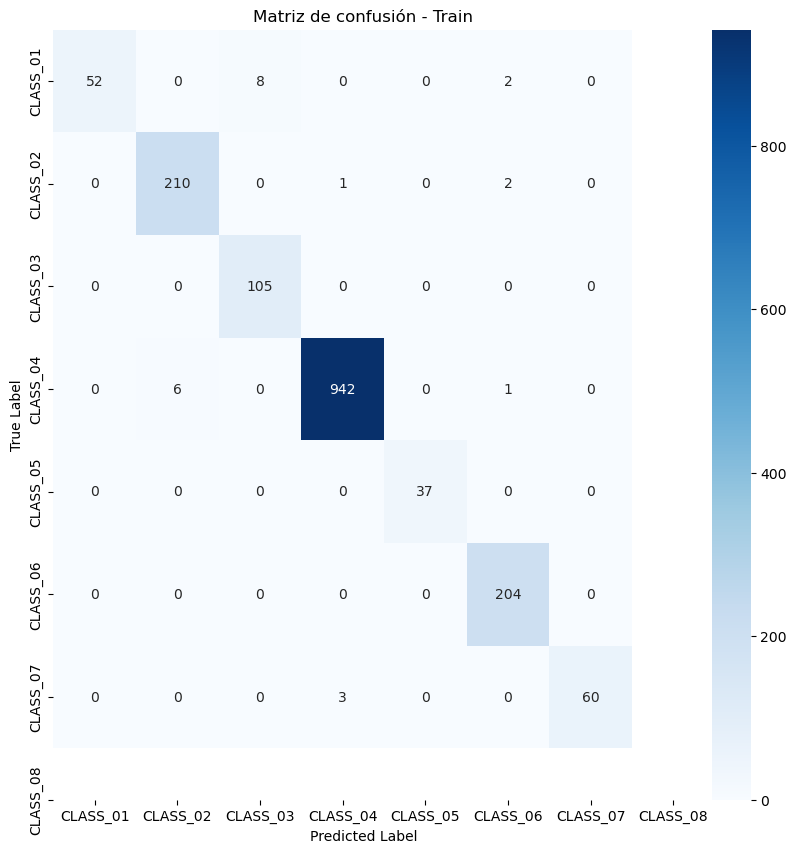

In [19]:
#Matriz de confusión
cm_labels = list(train_dataset.class_names)
cm = confusion_matrix(train_true_classes, train_pred_classes)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=cm_labels, yticklabels=cm_labels)
plt.title('Matriz de confusión - Train')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [15]:
#Evaluar el modelo
test_loss, test_accuracy = model.evaluate(test_dataset, verbose=1)
print(f'Model Accuracy: {round(test_accuracy,2)*100}%')

26/26 [==============================] - 18s 716ms/step - loss: 0.7850 - accuracy: 0.8556
Model Accuracy: 86.0%


In [16]:
#Obtener las etiquetas verdaderas para el conjunto de prueba
test_true_labels = test_generator.classes
#Obtener las etiquetas predichas para el conjunto de prueba
test_predictions = model.predict(test_generator)
test_predicted_labels = np.argmax(test_predictions, axis=1)

26/26 [==============================] - 18s 697ms/step


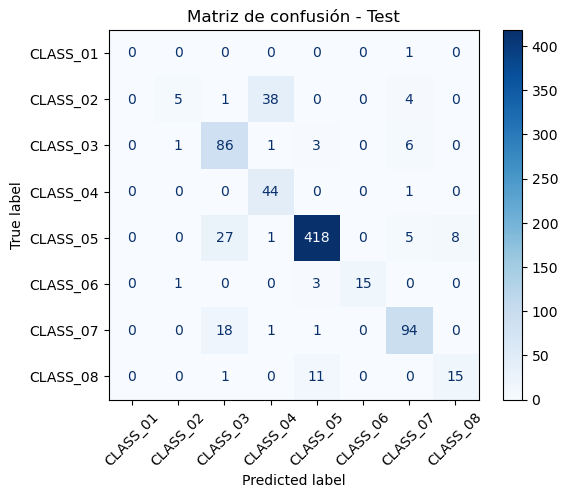

In [18]:
#Calculo de la matriz de confusión
confusion_mat = confusion_matrix(test_true_labels, test_predicted_labels)
#Trazo de la matriz de confusión
class_names = list(test_generator.class_indices.keys())
display = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=class_names)
display.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=45)
plt.title('Matriz de confusión - Test')
plt.show()

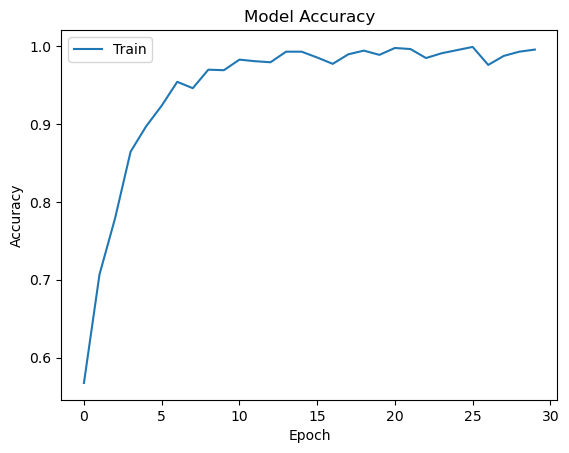

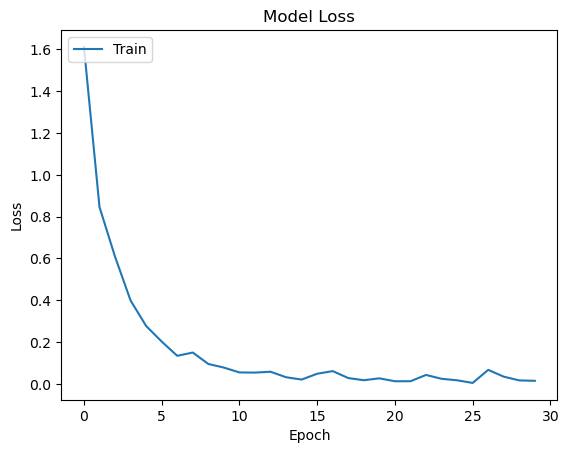

In [20]:
#Trazo de la precisión 
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [28]:
#Guardar el modelo entrenado
model.save('modelo.h5')

In [29]:
#Cargar el modelo entrenado
from tensorflow.keras.models import load_model
model = load_model('modelo.h5')

In [30]:
#Procesar una imagen
new_image = Image.open('C:/Users/marco/OneDrive/Documentos/GitHub/proyectoFinalTD/CarneDataset/prueba4.png')
new_image = new_image.resize((300, 300))  
new_image = np.array(new_image)
new_image = new_image / 255.0  
new_image = np.expand_dims(new_image, axis=0)  
#Mostrar los datos de predicción
predictions = model.predict(new_image)
predicted_class_index = np.argmax(predictions)
predicted_class = train_dataset.class_names[predicted_class_index]
prediction_percentage = np.max(predictions) * 100
print("Clase:", predicted_class)
print("% de precisión:", round(prediction_percentage, 2), "%")

1/1 [==============================] - 0s 107ms/step
Clase predicha: CLASS_07
Porcentaje de precisión: 100.0 %


In [41]:
#Procesar una imagen
new_image = Image.open('C:/Users/marco/OneDrive/Documentos/GitHub/proyectoFinalTD/CarneDataset/prueba6.png')
new_image = new_image.resize((300, 300))
new_image = np.array(new_image)
new_image = new_image / 255.0 
new_image = np.expand_dims(new_image, axis=0) 
#Mostrar los datos de predicción
predictions = model.predict(new_image)
predicted_class_index = np.argmax(predictions)
predicted_class = train_dataset.class_names[predicted_class_index]
prediction_percentage = np.max(predictions) * 100
print("Clase:", predicted_class)
print("% de precisión:", round(prediction_percentage, 2), "%")



1/1 [==============================] - 0s 59ms/step
Clase: CLASS_07
% de precisión: 100.0 %
